In [1]:
#%matplotlib inline # not today!
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact # for fancy plots
import ipywidgets as widgets

In [2]:
# let's make some data

def make_data(ndatapoints=100, noise=0, x2corr=-0.4):
    # generate our two stimulus features, x1 and x2
    x1 = np.random.randn(ndatapoints)
    
    # generate x2 that is negatively correlated with x1
    x2 = x2corr * x1 + (1 - np.abs(x2corr)) * np.random.randn(ndatapoints)
    
    # concatenate x1 and x2 into a matrix!
    x = np.vstack([x1, x2]).T
    
    # select some weights!
    b_true = np.array([3.7, -6.8])
    
    # make response
    y = np.dot(x, b_true) + np.random.randn(ndatapoints) * noise
    
    return x, y

In [3]:
x, y = make_data(ndatapoints=10, noise=0.5, x2corr=-0.4)
print(x)
print(y)

[[-0.80408116 -0.16610192]
 [ 0.74649641 -0.9198097 ]
 [-2.4772136   0.83502623]
 [ 0.14725056 -0.77684564]
 [ 0.21704749 -1.72107288]
 [ 1.45474249 -0.27706282]
 [-1.8481334   0.98541956]
 [-0.19016904 -0.81042179]
 [ 0.39021612  0.20719594]
 [ 1.32139289 -0.30048671]]
[ -2.44459932  10.47178892 -15.47210136   6.13855661  12.70917183
   7.03523194 -13.36592044   4.41649015  -0.22103364   7.37048842]


<IPython.core.display.Javascript object>


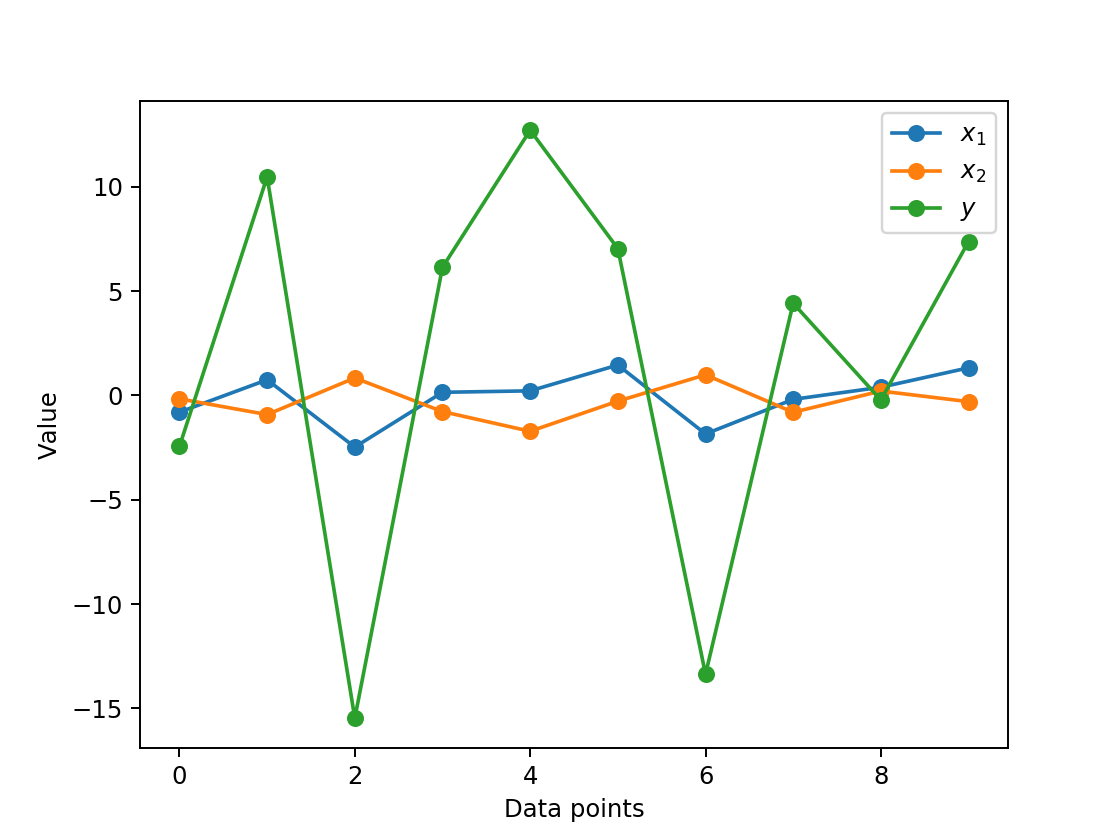

In [4]:
plt.plot(x[:,0], 'o-', label='$x_1$')
plt.plot(x[:,1], 'o-', label='$x_2$')
plt.plot(y, 'o-', label='$y$')
plt.xlabel("Data points")
plt.ylabel("Value")
plt.legend();

In [ ]:
# y = x1 * b1 + x2 * b2

In [8]:
y.shape

(10,)

In [5]:
b1, b2 = np.meshgrid(np.linspace(-2, 7, 50), np.linspace(-9, 1, 50))

bs = np.vstack([b1.ravel(), b2.ravel()])
print(bs.shape)

# get predicted response for each weight of weights
y_pred = np.dot(x, bs)

# calculate the error for each set of weights
err = ((y[:,np.newaxis] - y_pred) ** 2).sum(axis=0)
print(err.shape)

err_reshape = err.reshape(b1.shape)

(2, 2500)
(2500,)


<IPython.core.display.Javascript object>


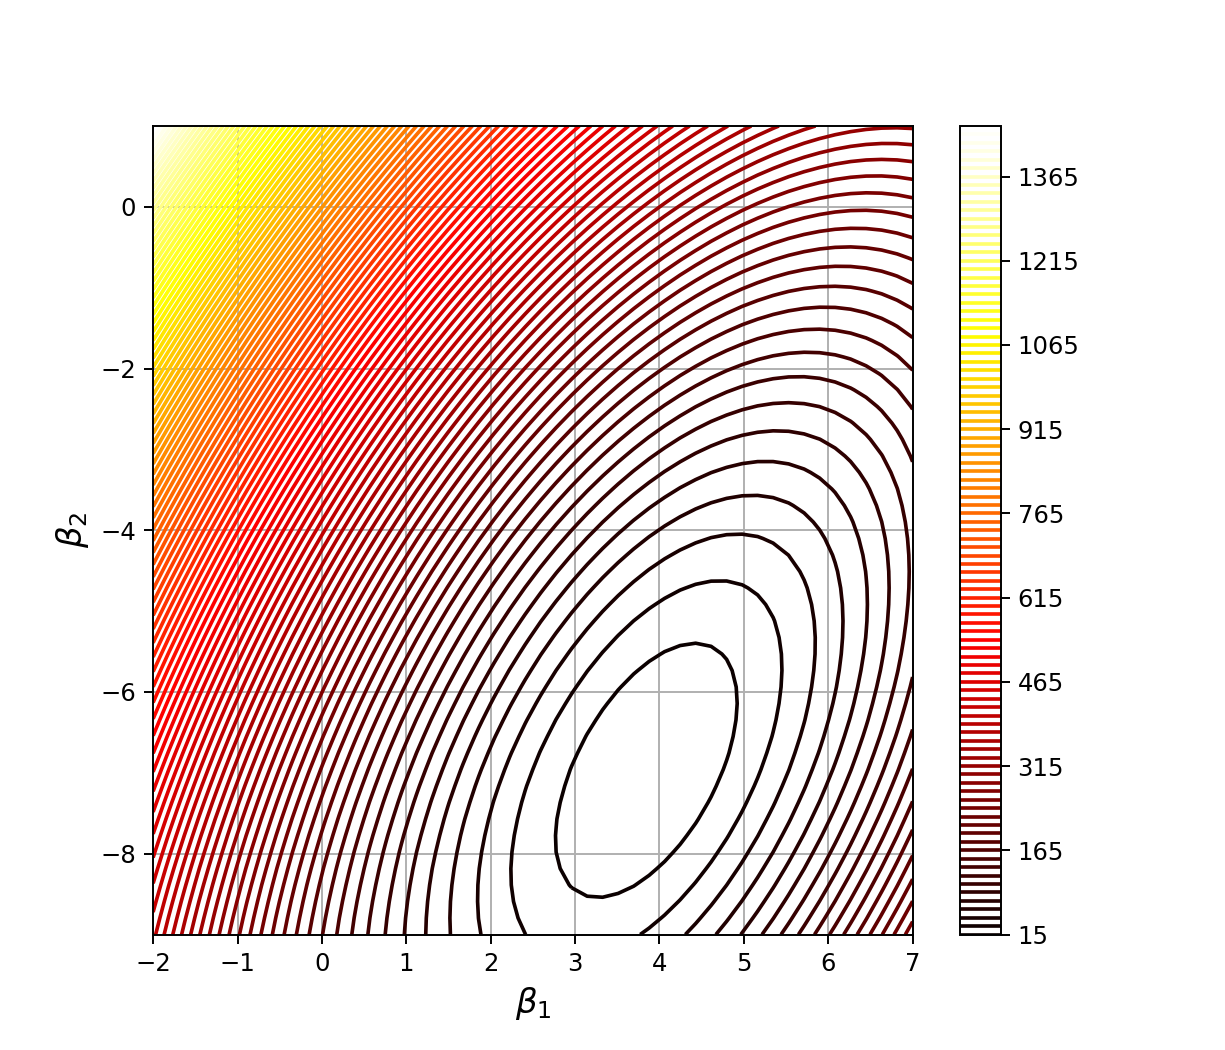

In [6]:
# plot the error for each combination of weights!
plt.figure(figsize=(7,6))
plt.contour(b1, b2, err_reshape, 100, cmap='hot')
plt.colorbar()
plt.xlabel(r"$\beta_1$", fontsize=14)
plt.ylabel(r"$\beta_2$", fontsize=14)
plt.grid();

In [8]:
steps = 500 # number of steps
step_size = 0.01 # how long is each step

b_est = np.array([0.0, 0.0])
b_est_history = np.zeros((steps+1, 2))
b_est_history[0] = b_est

for ii in range(steps):
    err = y - x.dot(b_est)
    step = x.T.dot(err)
    b_est += step_size * step
    b_est_history[ii+1] = b_est


In [14]:
x.shape

(10, 2)

In [ ]:
# model: y = x b

In [13]:
# find the exact solution using linear regression equation
b_exact = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))
print(b_exact)

# find the exact solution using np.linalg.lstsq
b_exact_2, res, rank, sing = np.linalg.lstsq(x, y)
print(b_exact_2)
print(res)
print(rank)
print(sing)

[ 3.84648087 -6.96955945]
[ 3.84648087 -6.96955945]
[2.70938466]
2
[4.20635455 2.03873984]


/Users/huth/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [15]:
err_reshape.shape

(50, 50)

In [16]:
# re-formulate from error to R^2
tss = (y ** 2).sum()
R2 = 1 - err_reshape/tss

<IPython.core.display.Javascript object>


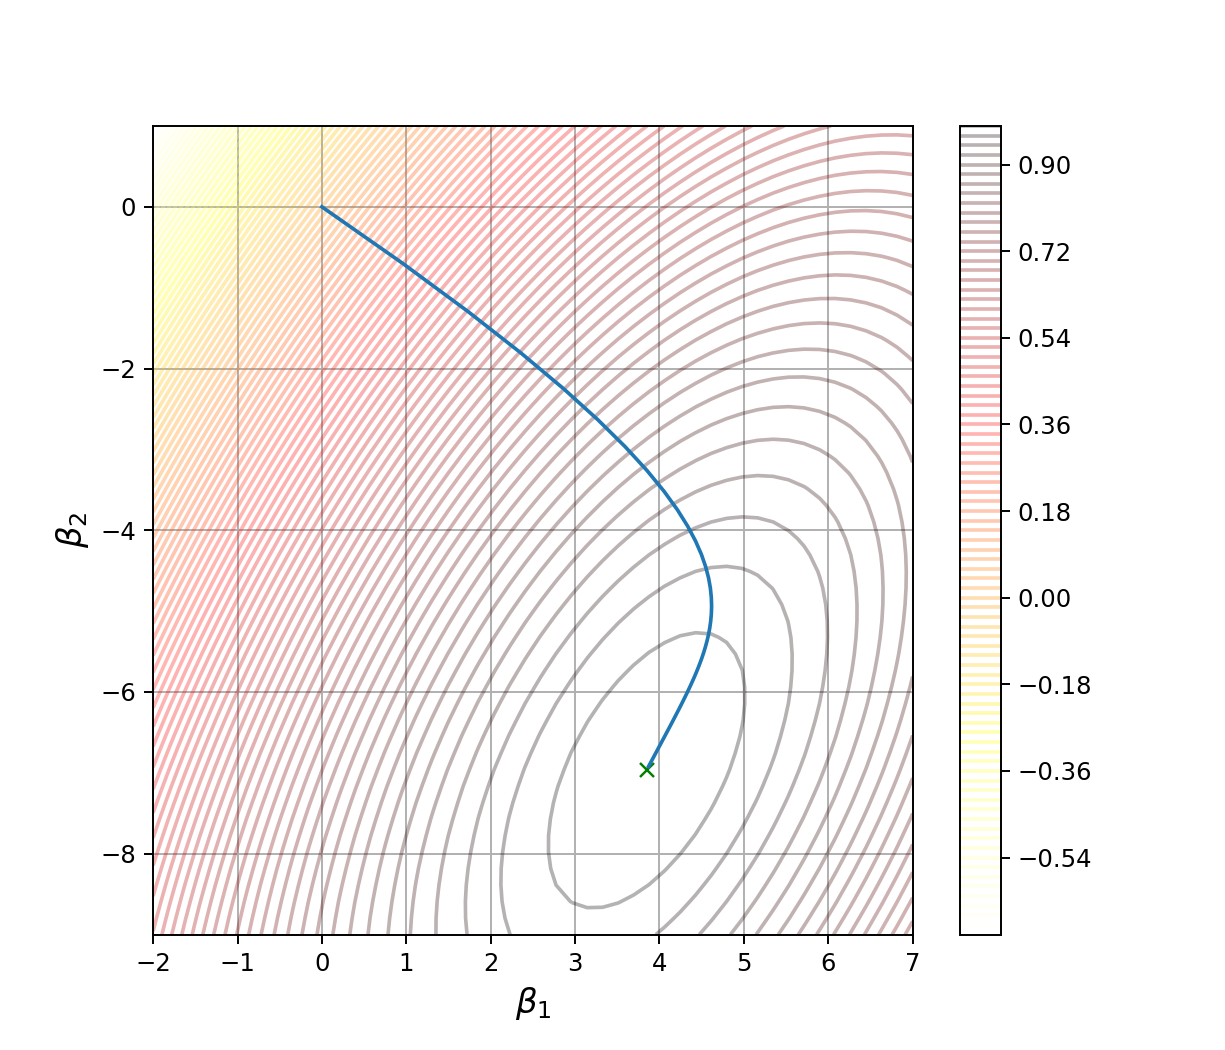

interactive(children=(IntSlider(value=1, description='view_steps', max=200, min=1), Output()), _dom_classes=('…

In [18]:
# plot the error for each combination of weights!
plt.figure(figsize=(7,6))
#plt.contour(b1, b2, err_reshape, 100, cmap='hot', alpha=0.3)
plt.contour(b1, b2, R2, 100, cmap='hot_r', alpha=0.3)
plt.colorbar()
plt.xlabel(r"$\beta_1$", fontsize=14)
plt.ylabel(r"$\beta_2$", fontsize=14)
plt.plot(b_exact[0], b_exact[1], 'gx')
plt.grid()

grad_line = plt.plot(b_est_history[:steps,0], b_est_history[:steps,1])[0]

def update(view_steps):
    grad_line.set_data(b_est_history[:view_steps,0], b_est_history[:view_steps,1])

t_slider = widgets.IntSlider(value=1, min=1, max=200, step=1)
interact(update, view_steps=t_slider);